In [23]:
import torch
import xarray
from datasets import *
from models import *
from dl_pipeline import *
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import copy

## Perturbation of Eigenvalues for Synthesis

We start with perturbation of the eigenvectors for synthesising new data from eiegenvalues closest to $0$. We take this perturbation to be sampled from a random distribution around a mean, $\mu$, of $0$, with a standard deviation of $\sigma$.

In [2]:
mu, sigma = 0, 0.001 # mean and standard deviation

In [39]:
train_ds, valid_ds, test_ds = generate_prediction_dataset()

191235


In [40]:
def new_example(model,x, perturb=True, sigma=0.01):
    s = np.random.normal(mu, sigma, 1)
    W = model_kae.dynamics.dynamics.weight.cpu().detach().numpy()
    w, v = np.linalg.eig(W)
    min_i = np.argmin(w)
    
    model = copy.deepcopy(model)
    
    if perturb:
        v[min_i] += s
    W_1 = reconstruct_operator(w,v).real
    
    model.dynamics.dynamics.weight = torch.nn.Parameter(torch.from_numpy(W_1))
    
    x_modified = model(x)
    
    return x_modified

In [41]:
model_kae = koopmanAE(4, steps=4, steps_back=4, alpha=1)
model_kae.load_state_dict(torch.load('saved_models/kae-model-continued-4.082315057579133.pt'))

<All keys matched successfully>

(tensor([[[[ 1.0391e+01,  7.0351e+00,  7.3102e+00,  8.1065e+00,  9.5472e+00,
            1.0655e+01,  1.1621e+01,  1.1943e+01,  1.1857e+01,  1.1089e+01,
            1.0550e+01,  9.7100e+00,  8.4250e+00,  7.6323e+00,  7.9617e+00,
            7.9038e+00,  8.2947e+00,  8.5409e+00,  8.7327e+00,  8.8594e+00],
          [ 1.0546e+01,  8.7689e+00,  6.4052e+00,  5.1057e+00,  5.3736e+00,
            6.6876e+00,  7.6504e+00,  7.6685e+00,  7.6106e+00,  7.5310e+00,
            6.6731e+00,  5.8948e+00,  6.0541e+00,  6.3292e+00,  7.1980e+00,
            8.9716e+00,  1.0561e+01,  1.0322e+01,  9.9272e+00,  9.5327e+00],
          [ 1.1053e+01,  1.2591e+01,  1.2287e+01,  4.9465e+00,  3.7520e+00,
            3.9185e+00,  4.3565e+00,  3.6180e+00,  3.6144e+00,  3.4588e+00,
            3.2923e+00,  4.0560e+00,  5.0913e+00,  5.6885e+00,  5.1166e+00,
            6.3328e+00,  7.6142e+00,  8.9680e+00,  9.7788e+00,  8.4431e+00],
          [ 1.1976e+01,  1.2436e+01,  7.1400e+00,  5.6017e+00,  4.2732e+00,
        

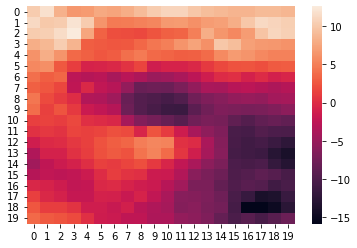

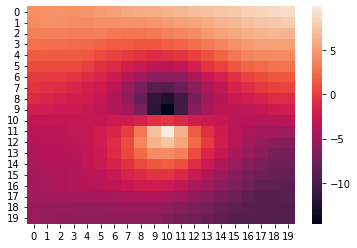

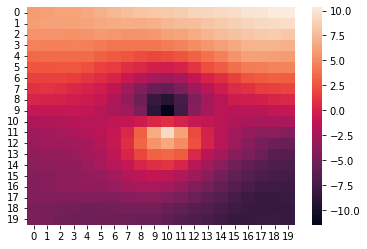

In [52]:
print(train_ds[31])
x_reg = new_example(model_kae,train_ds[31][0], True, sigma=0.08)[0][0][0].squeeze(0).detach().numpy()
x_per = new_example(model_kae,train_ds[31][0], False, sigma=0.01)[0][0][0].squeeze(0).detach().numpy()
old = train_ds[32][0].squeeze(0).squeeze(0)
seaborn.heatmap(old)
plt.show()
seaborn.heatmap(x_reg)
plt.show()
seaborn.heatmap(x_per)
plt.show()

In [38]:
new_example(model_kae)

TypeError: new_example() missing 1 required positional argument: 'x'

In [3]:
def reconstruct_operator(w, v):
    R = np.linalg.inv(v)
    # create diagonal matrix from eigenvalues
    L = np.diag(w)
    # reconstruct the original matrix
    B = v.dot(L).dot(R)
    return B

In [47]:
))

out1 = model_ae_modified(train[0][0].unsqueeze(0))[0]

W = model_ae_modified.dynamics.dynamics.weight.cpu().detach().numpy()
w, v = np.linalg.eigh(W)

w[0] = 0
v[0] = np.array([1,1,1,1])
W_1 = reconstruct_operator(w,v)
# seaborn.heatmap(W_1)
# plt.show()

model_ae_modified.dynamics.dynamics.weight = torch.nn.Parameter(torch.from_numpy(W_1))
plt.clf()
seaborn.heatmap(out1[0][0].squeeze(0).squeeze(0).cpu().detach().numpy())
plt.show()
out2 = model_ae_modified(train[0][0].unsqueeze(0))[0]
seaborn.heatmap(out2[0][0].squeeze(0).squeeze(0).cpu().detach().numpy())

SyntaxError: unmatched ')' (226838028.py, line 1)

In [46]:
seaborn.heatmap(out2[0][0].squeeze(0).squeeze(0).cpu().detach().numpy())

NameError: name 'out2' is not defined

In [75]:
model_dae, losses, fwd_loss, back_loss, iden_loss, cons_loss = train(model_dae, loader, len(dataset), koopman=False)

NameError: name 'model_dae' is not defined

Since we don't currently have the appropriate eigenvalues and eigenfunctions, we take an example where one eigenvalue is 0.

In [6]:
w = np.array([ 8.8045025+0.j, 0, -4.940018 +7.38418j, -4.940018 -7.38418j])
v = v

In [7]:
print(v)

[[-0.0285721   0.34093824 -0.27022386  0.89995766]
 [-0.19790614  0.9194667   0.10534161 -0.322982  ]
 [-0.6951611  -0.14423205  0.6648539   0.23220135]
 [ 0.6904838   0.13243599  0.68836874  0.17844142]]


In [8]:
reconstruct_operator(w,v).real

array([[-4.35457537,  1.62632309,  0.03007508, -0.04810565],
       [ 1.62632331, -0.22530384,  1.23579685, -1.27665373],
       [ 0.03007495,  1.23579676,  1.80477374, -6.69169657],
       [-0.04810561, -1.27665376, -6.69169713,  1.69957187]])